<a href="https://www.kaggle.com/code/marioayad/credit-score-classification-prediction-eda?scriptVersionId=127709761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data

In [2]:
data = pd.read_csv("../input/credit-score-classification/train.csv")


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
data.shape #check dimensions


(100000, 28)

In [7]:
data.describe()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [8]:
categorical = data.dtypes[data.dtypes == "object"].index
categorical
data[categorical].describe()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


# Cleaning Data & Missing values

In [9]:
data.drop('ID', inplace=True, axis=1)

In [10]:
data

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [11]:
data.isnull().sum()


Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<AxesSubplot:>

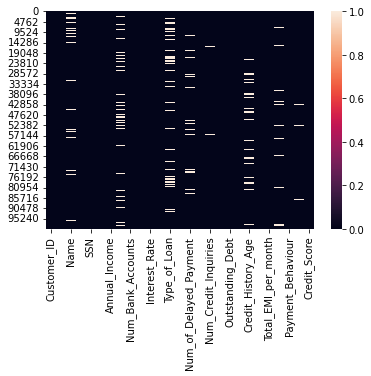

In [12]:
sns.heatmap(data.isnull())


In [13]:
data = data.dropna(thresh=23)


In [14]:
data.isnull().sum()


Customer_ID                     0
Month                           0
Name                         9978
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14996
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11401
Delay_from_due_date             0
Num_of_Delayed_Payment       6998
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9023
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4475
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [15]:
data.shape

(99993, 27)

<AxesSubplot:>

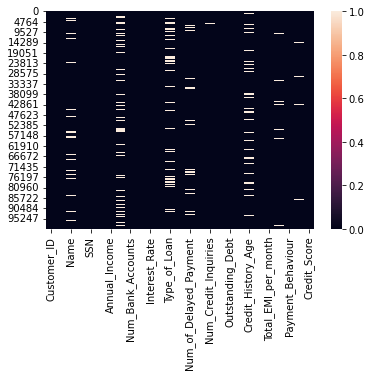

In [16]:
sns.heatmap(data.isnull())


In [17]:
data.loc[data.Monthly_Balance=='__-333333333333333333333333333__','Monthly_Balance'] = 0

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
data['Monthly_Balance'].value_counts()

0                     9
312.49408867943663    1
370.4370162624192     1
254.9709216273975     1
250.0931678204641     1
                     ..
366.2890379762706     1
151.1882696261166     1
306.75027851710234    1
278.8720257394474     1
393.6736955618808     1
Name: Monthly_Balance, Length: 98785, dtype: int64

# Filling missing values


In [19]:
data["Name"] = data["Name"].fillna(method='ffill')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data["Monthly_Inhand_Salary"].describe()


count    84997.000000
mean      4194.123442
std       3183.674894
min        303.645417
25%       1625.558333
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [21]:
data["Monthly_Inhand_Salary"] = data["Monthly_Inhand_Salary"].fillna(data["Monthly_Inhand_Salary"].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data["Type_of_Loan"].describe()


count             88592
unique             6260
top       Not Specified
freq               1408
Name: Type_of_Loan, dtype: object

In [23]:
data["Type_of_Loan"] = data["Type_of_Loan"].fillna(method='ffill')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data["Num_of_Delayed_Payment"].describe()


count     92995
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [25]:
data["Num_of_Delayed_Payment"] = data["Num_of_Delayed_Payment"].fillna(method='ffill')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
data["Num_Credit_Inquiries"].describe()

count    98028.000000
mean        27.755927
std        193.184133
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [27]:
data["Num_Credit_Inquiries"] = data["Num_Credit_Inquiries"].fillna(data["Num_Credit_Inquiries"].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
data["Credit_History_Age"].describe()


count                      90970
unique                       404
top       15 Years and 11 Months
freq                         446
Name: Credit_History_Age, dtype: object

In [29]:
data["Credit_History_Age"] = data["Credit_History_Age"].fillna(method='ffill')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
data["Amount_invested_monthly"].describe()


count         95518
unique        91046
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object

In [31]:
data["Amount_invested_monthly"] = data["Amount_invested_monthly"].fillna(method='ffill')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data["Monthly_Balance"].describe()


count     98793
unique    98785
top           0
freq          9
Name: Monthly_Balance, dtype: int64

In [33]:
data["Monthly_Balance"] = data["Monthly_Balance"].fillna(method='ffill')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
data.isnull().sum()

Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# EDA

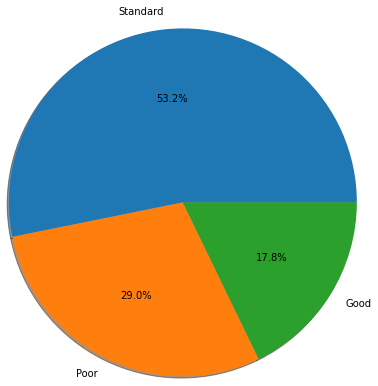

In [35]:
label = data.Credit_Score.value_counts().index
label_count = data.Credit_Score.value_counts().values
plt.pie(data=data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

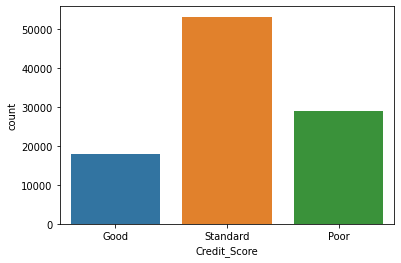

In [36]:
sns.countplot(x=data['Credit_Score'])


<AxesSubplot:xlabel='Occupation', ylabel='count'>

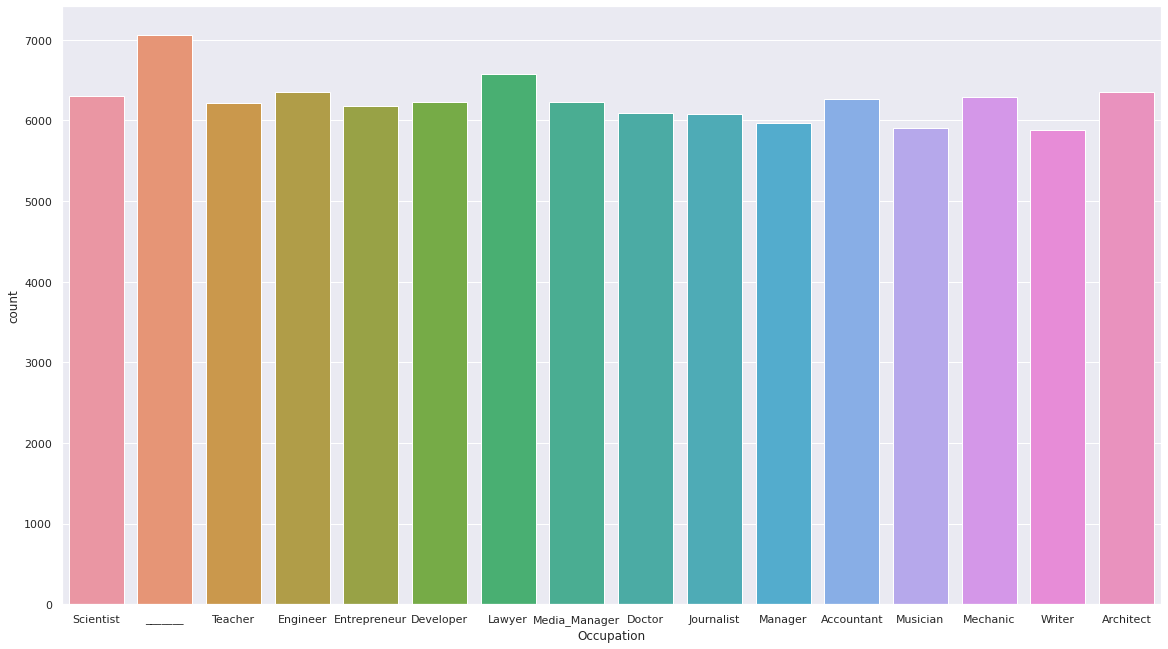

In [37]:
sns.set(rc={'figure.figsize':(19.7,11)})
sns.countplot(x=data["Occupation"])

<AxesSubplot:xlabel='Payment_of_Min_Amount', ylabel='count'>

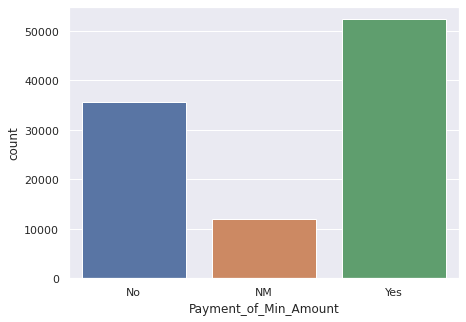

In [38]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=data,x="Payment_of_Min_Amount")

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

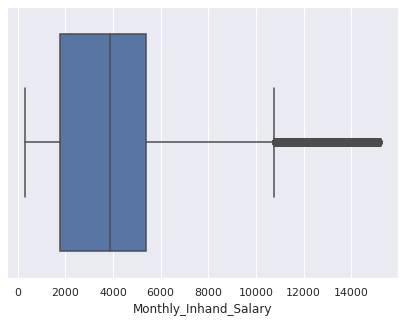

In [39]:
sns.boxplot(x=data["Monthly_Inhand_Salary"])


<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Credit_Score'>

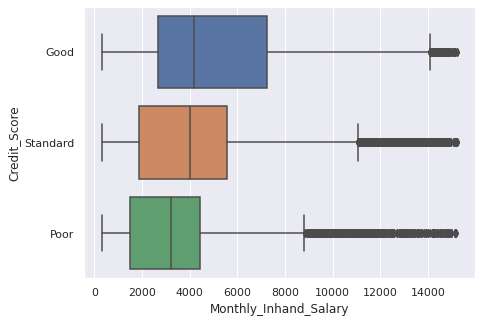

In [40]:
sns.boxplot(data=data, x="Monthly_Inhand_Salary", y="Credit_Score")


<AxesSubplot:xlabel='Month', ylabel='Interest_Rate'>

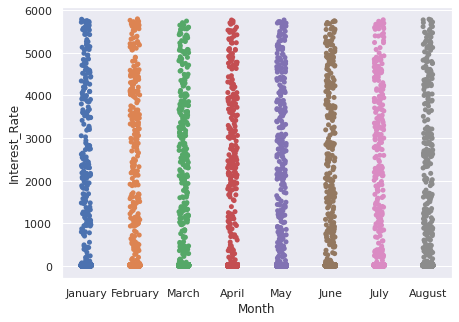

In [41]:
sns.stripplot(data=data, x="Month", y="Interest_Rate")


# Data Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99993 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               99993 non-null  object 
 1   Month                     99993 non-null  object 
 2   Name                      99993 non-null  object 
 3   Age                       99993 non-null  object 
 4   SSN                       99993 non-null  object 
 5   Occupation                99993 non-null  object 
 6   Annual_Income             99993 non-null  object 
 7   Monthly_Inhand_Salary     99993 non-null  float64
 8   Num_Bank_Accounts         99993 non-null  int64  
 9   Num_Credit_Card           99993 non-null  int64  
 10  Interest_Rate             99993 non-null  int64  
 11  Num_of_Loan               99993 non-null  object 
 12  Type_of_Loan              99993 non-null  object 
 13  Delay_from_due_date       99993 non-null  int64  
 14  Num_of

In [45]:
data.Monthly_Balance = data.Monthly_Balance.astype(float)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
for i in data.columns:
    if (data[i].dtypes== 'object') :
        data[i] = le.fit_transform(data[i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99993 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               99993 non-null  int64  
 1   Month                     99993 non-null  int64  
 2   Name                      99993 non-null  int64  
 3   Age                       99993 non-null  int64  
 4   SSN                       99993 non-null  int64  
 5   Occupation                99993 non-null  int64  
 6   Annual_Income             99993 non-null  int64  
 7   Monthly_Inhand_Salary     99993 non-null  float64
 8   Num_Bank_Accounts         99993 non-null  int64  
 9   Num_Credit_Card           99993 non-null  int64  
 10  Interest_Rate             99993 non-null  int64  
 11  Num_of_Loan               99993 non-null  int64  
 12  Type_of_Loan              99993 non-null  int64  
 13  Delay_from_due_date       99993 non-null  int64  
 14  Num_of

In [48]:
data.head(10)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,12320,3,84,308,10205,12,6011,1824.843333,3,4,...,3,12061,26.822620,180,1,49.574949,81511,3,312.494089,0
1,12320,2,84,308,10205,12,6011,4194.123442,3,4,...,1,12061,31.944960,180,1,49.574949,7661,4,284.629162,0
2,12320,6,84,0,10205,12,6011,4194.123442,3,4,...,1,12061,28.609352,184,1,49.574949,82224,5,331.209863,0
3,12320,0,84,308,10205,12,6011,4194.123442,3,4,...,1,12061,31.377862,185,1,49.574949,30358,6,223.451310,0
4,12320,7,84,308,10205,12,6011,1824.843333,3,4,...,1,12061,24.797347,186,1,49.574949,55362,2,341.489231,0
5,12320,5,84,308,10205,12,6011,4194.123442,3,4,...,1,12061,27.262259,187,1,49.574949,70813,0,340.479212,0
6,12320,4,84,308,10205,12,6011,1824.843333,3,4,...,1,12061,22.537593,188,1,49.574949,25839,6,244.565317,0
7,12320,1,84,308,0,12,6011,1824.843333,3,4,...,1,12061,23.933795,188,1,49.574949,37319,2,358.124168,2
8,1066,3,7491,450,53,15,10300,3037.986667,2,4,...,1,10795,24.464031,236,1,18.816215,1916,6,470.690627,2
9,1066,2,7491,429,53,13,10300,3037.986667,2,4,...,1,10795,38.550848,237,1,18.816215,54511,1,484.591214,0


# Data Split

In [49]:
from sklearn.model_selection import train_test_split 

In [50]:
x = data.drop("Credit_Score", axis = 1).values
y = data['Credit_Score'].values 


In [51]:
x_train,x_test ,y_train,y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [52]:
x_train.shape

(74994, 26)

# Data Scaling using Robust Scaler¶


In [53]:
from sklearn.preprocessing import RobustScaler


In [54]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

 # Modelling Phase

# Logistic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()

In [57]:
lr.fit(x_train , y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [58]:
lr.score(x_train , y_train)

0.5953276262100968

In [59]:
lr.score(x_test , y_test)

0.5906636265450618

In [60]:
lr.intercept_

array([-1.00211382, -0.02999616,  1.03210998])

In [61]:
lr.coef_

array([[ 2.77528652e-02, -6.80258782e-02,  6.08408174e-03,
         2.00105978e-01,  7.33349413e-03, -5.68916938e-02,
        -8.63744199e-02,  1.41103182e-01, -1.73301867e-04,
        -2.76216954e-04,  1.79697676e-04, -3.45577462e-01,
         8.80094058e-03, -1.02961476e+00,  2.06821723e-02,
         6.45316150e-02, -3.65787476e-04, -1.72065896e-01,
         1.36514969e-01, -9.75339655e-03,  7.67926076e-02,
        -3.97099159e-01,  2.12822696e-04,  2.57981945e-02,
        -1.79616173e-01, -9.47032376e-02],
       [-3.30218769e-02,  3.50694640e-02,  2.11214991e-03,
        -1.65304236e-01, -4.41412453e-02,  3.38511694e-02,
         1.17179268e-01, -1.23558216e-01,  2.64175276e-05,
         3.86950306e-04, -1.97881241e-04,  3.84932452e-01,
         1.04502959e-02,  8.15549184e-01,  2.89098894e-02,
         3.49346568e-02,  5.33382728e-04, -5.00294435e-02,
        -2.96161732e-01,  1.12658807e-02, -7.50784595e-02,
         1.45494321e-01,  1.33290985e-04, -3.19039587e-02,
         1.38

In [62]:
lr.predict(x_test)

array([2, 0, 0, ..., 1, 0, 2])

In [63]:
y_pred = lr.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(20)

,Y_test,Y_pred
0,2,2
1,2,0
2,2,0
3,1,2
4,2,2
5,2,1
6,1,2
7,2,0
8,1,2
9,2,2


# KNN Model

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=9) #n_neighbors = K Number

In [66]:
knn.fit(x_train , y_train )

KNeighborsClassifier(n_neighbors=9)

In [67]:
knn.score(x_train , y_train )

0.7444195535642851

In [68]:
knn.score(x_test , y_test )

0.6628665146605864

In [69]:
knn.predict(x_test)

array([2, 2, 0, ..., 1, 0, 2])

In [70]:
y_pred2 = knn.predict(x_test)
df2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred2})
df2.head(20)

,Y_test,Y_pred
0,2,2
1,2,2
2,2,0
3,1,2
4,2,1
5,2,2
6,1,2
7,2,2
8,1,1
9,2,0
